# Data visualization

In [28]:
import pandas as pd
url_ca = 'https://www.casact.org/research/reserve_data/comauto_pos.csv'

df_ca = pd.read_csv(url_ca)

In [29]:
# Get some prior amounts and incrementals
df_ca_gb = df_ca.sort_values(
        by = ['GRNAME', 'AccidentYear', 'DevelopmentLag']
    ).groupby(
        ['AccidentYear', 'GRNAME']
    )
df_ca['prior_paid'] = df_ca_gb['CumPaidLoss_C'].shift(1)
df_ca['prior_incurred'] = df_ca_gb['IncurLoss_C'].shift(1)

df_ca['incremental_paid'] = df_ca['CumPaidLoss_C'] - df_ca['prior_paid']
df_ca['incremental_incurred'] = df_ca['IncurLoss_C'] - df_ca['prior_incurred']

In [34]:
df_one = df_ca.query(
      'GRNAME.str.contains("State Farm")'
    , engine = 'python'
)

df_one.shape

(100, 17)

In [ ]:
df_one

## Matplotlib

* Very common library, good starting point
* Comparable to base R
* Gets the job done, lets you get on with your life
* Not super pretty

In [ ]:
from matplotlib import pyplot as plt

### Magic commands

https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib

In [ ]:
# tell Jupyter to plot graphs
# %matplotlib inline

### Scatterplot

In [ ]:
df_1988 = df_one[df_one['AccidentYear'] == 1988]

In [ ]:
plt.plot(
      df_1988['DevelopmentLag']
    , df_1988['BulkLoss_C']
)

In [ ]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
)

Change some visual characteristics with function arguments.

Decorate the plot with functions like `title()` and `ylabel()`

In [ ]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
    , color = 'red'
    , marker = 'o'
    , linestyle = 'dashed'
)


In [ ]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , 'ro--'
    , data = df_1988
)

In [ ]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , 'ro--'
    , data = df_1988
)
plt.title('IBNR by AY')
plt.xlabel('Accident Year')
plt.ylabel("IBNR ($000s)")

### Multiple series

In [ ]:
plt.plot(
      df_1988['DevelopmentLag']
    , df_1988['incremental_paid']
    , 'ro'
    , df_1988['DevelopmentLag']
    , df_1988['incremental_incurred']
    , 'bo'
)

In [ ]:
plt.plot(
      'DevelopmentLag'
    , 'incremental_paid'
    , 'ro'
    , data = df_1988
)
plt.plot(
      'DevelopmentLag'
    , 'incremental_incurred'
    , 'bo'
    , data = df_1988
)

### Styling

In [ ]:
plt.style.use('ggplot')
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
)

In [ ]:
plt.style.available

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
)

plt.style.use('default')

In [ ]:
# if you like TeX
import numpy as np
xs = np.linspace(1/10000, .5, 10000)
ys = np.sin(1/xs)
plt.plot(xs, ys, linewidth=0.5, label='For legend')
plt.gca().set(title='Graph of $\sin(x^{-1})$)')
plt.legend(title='Legend Title')

## Other Options

Task | Solution | 
:--|:--|
Format axis labels | Tough
Control y-axis limits | xlim, ylim | 
suppress line | linestyle='' 
multiple series | plot(x,y, a, b) etc. or sequential plots 
suppress marker |  marker=''
marker labels | label='asdf' and add plt.legend()

## Seaborn

* Wrapper around matplotlib to make life easier
* Smells a little like ggplot2
* Nice support for basic statistical visualization

> If matplotlib tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too. 
  (Michael Waskom, *Introduction to Seaborn*)

In [ ]:
import seaborn as sns
# need searborn 0.9.0 or later for relplot

sns.set()
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , hue = "AccidentYear"
    , data = df_one
    , kind = 'line'
)

In [ ]:
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , hue = "AccidentYear"
    , markers = True
    , kind = 'line'
    , data = df_one
)

In [ ]:
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , units = "AccidentYear"
    , markers = True
    , kind = 'line'
    , data = df_one
    , estimator = None
)

In [ ]:
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , data = df_one
    , kind = 'line'
    , col = "AccidentYear"
    , col_wrap = 3
)

In [ ]:
sns.lmplot(
      x = "prior_paid"
    , y = "incremental_paid"
    , data = df_one
)

In [ ]:
sns.lmplot(
      x = "prior_paid"
    , y = "incremental_paid"
    , hue = 'DevelopmentLag'
    , data = df_one
)

In [ ]:
sns.lmplot(
      x = "prior_paid"
    , y = "incremental_paid"
    , hue = 'DevelopmentLag'
    , data = df_one
    , col = "DevelopmentLag"
    , col_wrap = 3
)

In [ ]:
sns.residplot(
      x = "DevelopmentLag"
    , y = "incremental_paid"
    , data = df_one)

histogram?

density plots?


In [43]:
import numpy as np

norms = np.random.normal(10, 1, 1000)

C:\Users\bfannin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


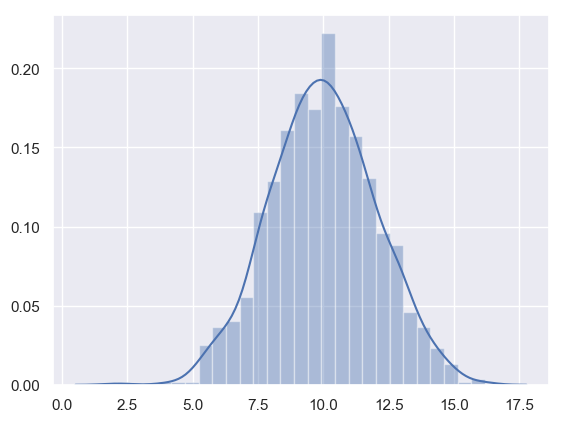

In [38]:
sns.distplot(norms)

In [44]:
from math import exp

exp_vec = np.vectorize(exp)
log_norms = exp_vec(norms)

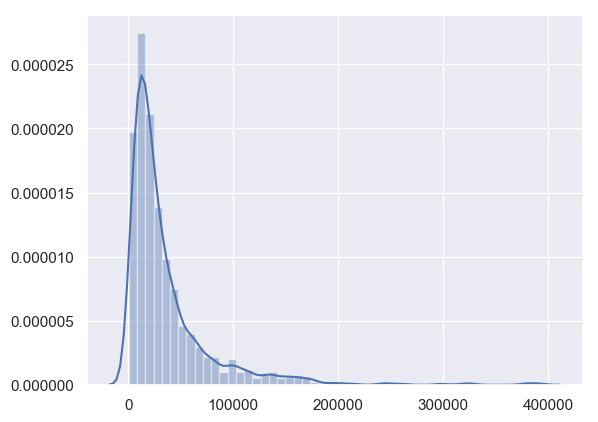

In [45]:
sns.distplot(log_norms)

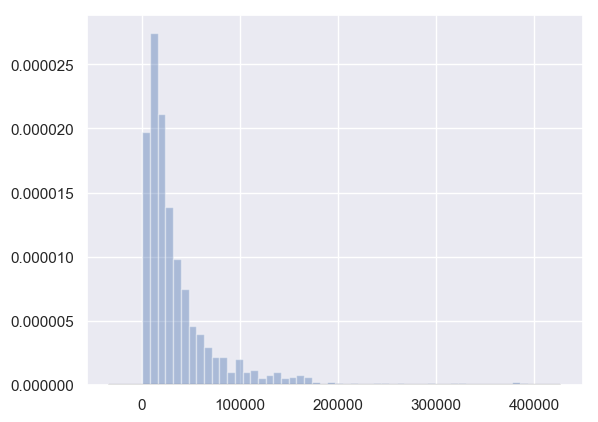

In [50]:
from scipy import stats

sns.distplot(log_norms, kde = False, fit=stats.gamma)

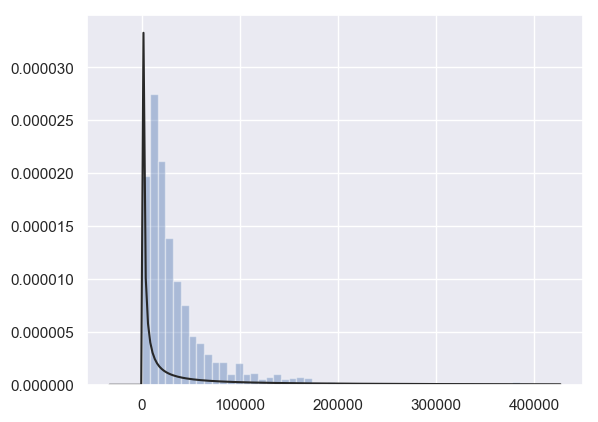

In [52]:
sns.distplot(log_norms, kde = False, fit=stats.lognorm)